In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Dummy Data HSS.csv")
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [ ]:
df.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [ ]:
df['TV'].value_counts()

TV
43.0    70
40.0    67
47.0    65
34.0    65
21.0    64
        ..
76.0    36
81.0    36
91.0    34
71.0    32
57.0    31
Name: count, Length: 91, dtype: int64

In [ ]:
# delete missing values
df1 = df.dropna()
df1.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1.describe()

,TV,Radio,Social Media,Sales
count,4546.000000,4546.000000,4546.000000,4546.000000
mean,54.062912,18.157533,3.323473,192.413332
std,26.104942,9.663260,2.211254,93.019873
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.555355,1.530822,112.434612
50%,53.000000,17.859513,3.055565,188.963678
75%,77.000000,25.640603,4.804919,272.324236
max,100.000000,48.871161,13.981662,364.079751


In [ ]:
df1['Influencer'].unique()

array(['Mega', 'Micro', 'Nano', 'Macro'], dtype=object)

In [ ]:
df1['Influencer'].value_counts()

Influencer
Mega     1152
Micro    1148
Nano     1134
Macro    1112
Name: count, dtype: int64

In [ ]:
mapping = {'Mega' : '1',
           'Micro' : '2',
           'Nano' : '3',
           'Macro' : '4'}

In [ ]:
df1['Influencer'] = df['Influencer'].map(mapping)
df1['Influencer'].unique()

<ipython-input-36-7933d2e41c3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Influencer'] = df['Influencer'].map(mapping)


array(['1', '2', '3', '4'], dtype=object)

In [ ]:
df1.sample(5)

,TV,Radio,Social Media,Influencer,Sales
3105,72.0,24.402636,1.995127,4,253.708224
2314,100.0,27.779895,5.280721,1,359.038843
3850,35.0,14.824545,1.765248,3,122.065538
4070,83.0,26.502475,5.901473,4,296.326787
2627,36.0,1.546545,0.259152,2,128.341659


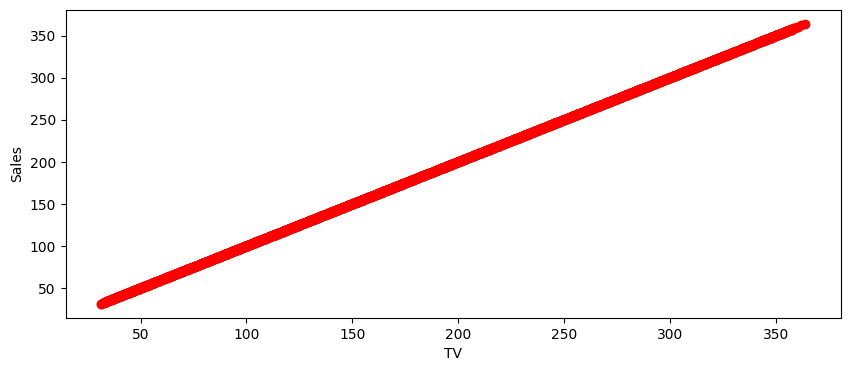

In [ ]:
plt.figure(figsize = (10,4))
plt.scatter(x =df1['Sales'] , y =df1['Sales'] , color = 'red' )
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

<Axes: ylabel='Sales'>

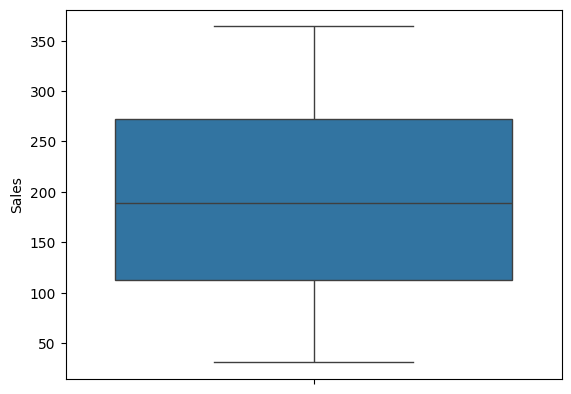

In [ ]:
import seaborn as sns
sns.boxplot(df1['Sales'])

In [ ]:
df1.corr()

,TV,Radio,Social Media,Influencer,Sales
TV,1.000000,0.869158,0.527687,0.020478,0.999497
Radio,0.869158,1.000000,0.606338,0.009146,0.868638
Social Media,0.527687,0.606338,1.000000,0.001176,0.527446
Influencer,0.020478,0.009146,0.001176,1.000000,0.020404
Sales,0.999497,0.868638,0.527446,0.020404,1.000000


In [ ]:
x = df1.drop(columns =['Sales'])
y = df1['Sales']
x,y

(        TV      Radio  Social Media Influencer
 0     16.0   6.566231      2.907983          1
 1     13.0   9.237765      2.409567          1
 2     41.0  15.886446      2.913410          1
 3     83.0  30.020028      6.922304          1
 4     15.0   8.437408      1.405998          2
 ...    ...        ...           ...        ...
 4567  26.0   4.472360      0.717090          2
 4568  71.0  20.610685      6.545573          3
 4569  44.0  19.800072      5.096192          2
 4570  71.0  17.534640      1.940873          4
 4571  42.0  15.966688      5.046548          2
 
 [4546 rows x 4 columns],
 0        54.732757
 1        46.677897
 2       150.177829
 3       298.246340
 4        56.594181
            ...    
 4567     94.685866
 4568    249.101915
 4569    163.631457
 4570    253.610411
 4571    148.202414
 Name: Sales, Length: 4546, dtype: float64)

In [ ]:
#Scalling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= scaler.fit_transform(x)
x

array([[-1.45823346, -1.19965497, -0.18791862, -1.33068354],
       [-1.57316687, -0.92316155, -0.41334293, -1.33068354],
       [-0.50045503, -0.23504873, -0.1854639 , -1.33068354],
       ...,
       [-0.38552162,  0.16999646,  0.80176862, -0.43475828],
       [ 0.64887908, -0.064467  , -0.62532471,  1.35709225],
       [-0.46214389, -0.22674405,  0.77931543, -0.43475828]])

In [ ]:
# train and test data
from sklearn.model_selection import train_test_split
x_train,x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)
x_train.size , x_test.size

(14544, 3640)

In [ ]:
y_train

566     343.046048
3972     84.115663
2123    118.885553
3305    123.857810
4358    277.459436
           ...    
4452    119.220715
492      56.484931
3118    128.471735
3798    139.228627
886     237.950975
Name: Sales, Length: 3636, dtype: float64

In [ ]:
# linear regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)
y_pred

array([ 53.25917432,  71.06880271, 267.03316056, 195.75264143,
       274.0300176 ,  38.97500908, 145.84899988, 224.21028326,
       217.0989638 , 320.40616426, 103.11367583,  42.52650827,
       274.12361638, 227.85798523, 281.23207922, 220.62310853,
       270.49219141, 323.91281553, 284.73563831, 213.57664447,
       245.62910187, 313.31090669,  63.90836646, 227.79947602,
       106.73149035, 152.97518399,  46.13624497, 231.4170062 ,
        42.58820672, 160.06061367, 113.7938796 , 227.73951257,
       274.07465305,  60.40035028, 188.66579132, 167.26433734,
       206.46106467, 266.88918794, 270.48643579, 227.81408967,
       156.58986233, 291.92628301, 185.02152047,  35.46660336,
       249.17529805, 117.35974882, 263.41919329, 266.98151197,
        56.83383266, 245.64122295, 238.40142178,  49.68485649,
       156.53429926, 277.61723724, 106.70779386, 167.27563467,
        99.57668946, 284.86133521, 281.28856715,  67.49029745,
       252.7558762 , 142.35389533, 234.9085386 , 213.58

In [ ]:
residual = y_pred - y_test
residual

497    -2.002110
3800    3.493899
24     -5.216947
1918    0.650465
142     0.069640
          ...   
3799   -4.879587
2133    3.414276
4410   -4.178217
434    -0.393281
178     1.175726
Name: Sales, Length: 910, dtype: float64

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9990105371066827

In [ ]:
import pickle
pickle.dump(lr,open('model_sales.pkl', 'wb'))